<a href="https://colab.research.google.com/github/mmdrahmani/python-for-neuroscience/blob/main/tutorial_01_sine_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

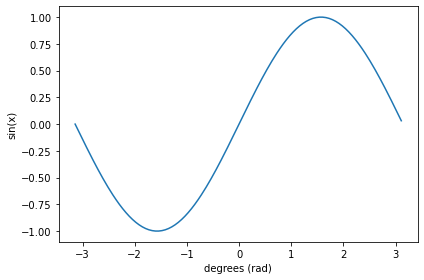

In [ ]:
x = np.arange(-np.pi,np.pi,np.pi/100)
y = np.sin(x)

plt.plot(x,y)
plt.xlabel('degrees (rad)')
plt.ylabel('sin(x)')
plt.tight_layout()

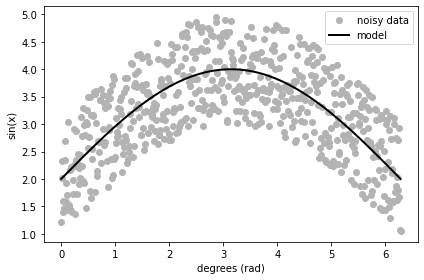

In [ ]:
N, amp, omega, phase, offset, noise = 600, 2, 0.5, 0, 2, 2
x = np.linspace(0, np.pi*2, N)
y = amp*np.sin(omega*x + phase) + offset
y_noise = y + noise*(np.random.random(len(x))-0.5)

plt.plot(x,y_noise, marker='o', color=(.7,.7,.7), linestyle='',label='noisy data')
plt.plot(x,y,'k',label='model',linewidth=2)
plt.xlabel('degrees (rad)')
plt.ylabel('sin(x)')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
import numpy, scipy.optimize

def func_fit_sine(x, y):
    '''Fit sin to the input time sequence, and return fitting parameters:
     "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
     
    x = numpy.array(x)
    y = numpy.array(y)
    ff = numpy.fft.fftfreq(len(x), (x[1]-x[0]))   # assume uniform spacing
    f_real = abs(numpy.fft.fft(y))
    estimated_f = abs(ff[numpy.argmax(f_real[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    estimated_a = numpy.std(y) * 2.**0.5
    estimated_o = numpy.mean(y)
    params = numpy.array([estimated_a, 2.*numpy.pi*estimated_f, 0., estimated_o])

    # define a full sine function
    def func_sine(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c

    # fit using scipy
    popt, pcov = scipy.optimize.curve_fit(func_sine, x, y, p0=params)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (params,popt,pcov)}

In [ ]:
res = func_fit_sine(x, y_noise)
print( "Predicted Parameters:\n\n Amplitude=%(amp)s,\n Angular freq.=%(omega)s,\n phase=%(phase)s,\n offset=%(offset)s,\n Max. Cov.=%(maxcov)s" % res )

In [ ]:
plt.plot(x,y_noise, marker='o', color=(.7,.7,.7), linestyle='',label='noisy data')
plt.plot(x,y,'k',label='model',linewidth=2)
plt.xlabel('degrees (rad)')
plt.ylabel('sin(x)')
plt.tight_layout()

# plot the fitted model
plt.plot(x, res['fitfunc'](x), 'r-', label='fit',linewidth=2)
plt.legend(loc='best')

In [ ]:
res['fitfunc']

In [ ]:
import os

filepath = './dir/subdir/filename.ext'
#os.path.dirname(filepath)
os.path.splitext(filepath)[0]